# Data Wrangling
<hr style="border:2px solid black">

## 1. Introduction

**what is it?**

- part of the early stages of the data analytics process
- the process of transforming data from one format to another
- makes data more approprite and valuable for inquiries in data analytics

**why data wrangling?**

- wrangled data lends ease to transformation, analysis, and visualization

**long format**

- there is a single "value" column
- another column contains the variable name for each value
- great for plotting with seaborn

**wide format** 

- each variable is a column
- each observation is a row
- great for calculating descriptive statistics

<img src='long_vs_wide.png' width=600>

**data wrangling types** 

|example|what it does|
|:--:|:--:|
|`melting`|converts a dataframe from wide to long format|
|`pivoting`|converts a dataframe from long to wide format|
|`stacking`|moves columns to hierarchical row index|
|`unstacking`|creates columns from hierarchical row index|
|`concatenating`|sticks two dataframes together|
|`merging`|joins two datadrames on specific indexes/columns|
|`groupby-aggregation`|performs a split-apply-combine operation based on some criteria|

<hr style="border:2px solid black">

## 2. Example: Penguins Dataset

**load packages**

In [1]:
# data analysis stack
import numpy as np
import pandas as pd

# data visualization stack
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

**load data**

In [2]:
penguins = sns.load_dataset("penguins")

**show data head**

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


**example of a *tidy dataset***

- observational unit ==: one penguin... every operational unit is equal to one penguin... not a mix of anything else
- each variable is a column
- the table is all about penguins

**untidy datasets may have**:

- column headers that are values, not variable names
- multiple variables stored in one column
- variables stored in both rows and columns
- multiple types of observational units stored in the same table
- a single observational unit stored in multiple tables

***It is essential to first have tidy data before wrangling***

**quick data exploration**

In [4]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
penguins.shape

(344, 7)

### Data Visualization

**gender-specific islandwise penguin distribution**

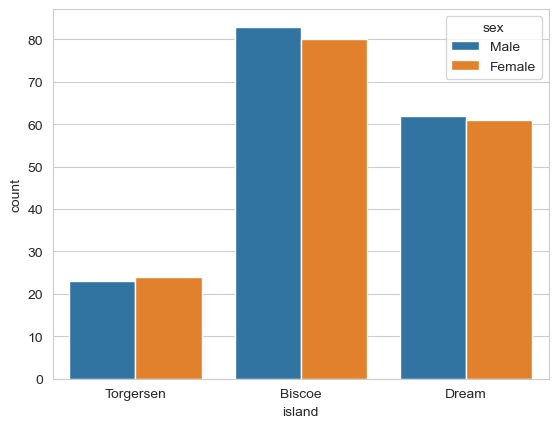

In [7]:
sns.countplot(
    data=penguins,
    x='island',
    hue='sex'
);

#### Let's imagine we want now to compare penguins from different islands, but now we want to use the type of the bill measurement as the hue.

**bill-length in various islands**

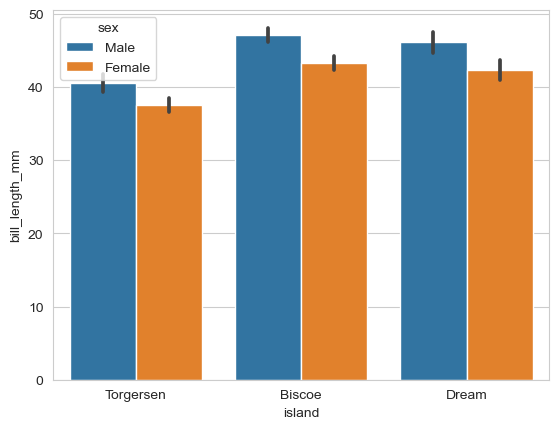

In [8]:
# barplot

sns.barplot(
    data=penguins,
    x='island',
    y='bill_length_mm',
    hue='sex'
);

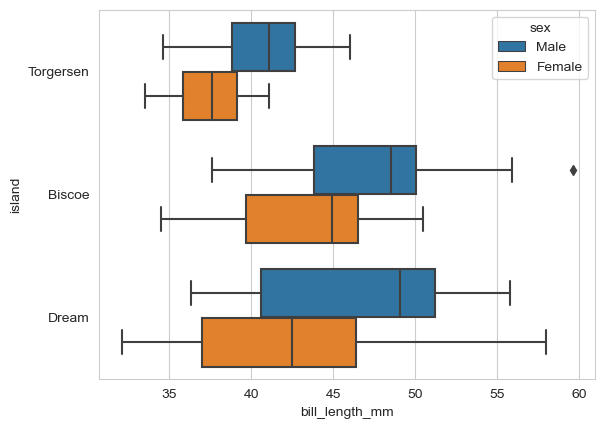

In [9]:
# boxplot

sns.boxplot(
    data=penguins,
    x='bill_length_mm',
    y='island',
    hue='sex'
);

Note:

There is no easy option to bring both of the bill measurements to a single visual besides changing the format of the data. To bring both of the bill measurements it would be helpful to have the distinction between the measurements in a column (the same way as we have it for e.g. island)

### Data Wrangling 

In [10]:
# penguin id column
penguins['id'] = penguins.index

In [11]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,id
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,2
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,3
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,4


**`Melt`**

- used to transform the data from wide to long format.

- id_vars:                 <=== Column(s) to use as identifier variables
- value_vars:              <=== Column(s) to unpivot. If not specified, uses all columns that are not set as id_vars.
- var_name:                <=== Name to use for the ‘variable’ column.
- value_name:              <=== Name to use for the ‘value’ column.

In [12]:
penguins.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,id
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1


In [13]:
penguins_long = pd.melt(
    frame=penguins, # dataset
    id_vars=['id','sex','species','island'], # Column(s) to use as identifier variables
    value_vars=['bill_length_mm','bill_depth_mm'], # Column(s) to unpivot
    var_name='bill_measurement',  # Name to use for the ‘variable’ column
    value_name='value' # Name to use for the ‘value’ column
)

In [14]:
penguins_long.head()

,id,sex,species,island,bill_measurement,value
0,0,Male,Adelie,Torgersen,bill_length_mm,39.1
1,1,Female,Adelie,Torgersen,bill_length_mm,39.5
2,2,Female,Adelie,Torgersen,bill_length_mm,40.3
3,3,NaN,Adelie,Torgersen,bill_length_mm,NaN
4,4,Female,Adelie,Torgersen,bill_length_mm,36.7


In [15]:
penguins_long.tail()

,id,sex,species,island,bill_measurement,value
683,339,NaN,Gentoo,Biscoe,bill_depth_mm,NaN
684,340,Female,Gentoo,Biscoe,bill_depth_mm,14.3
685,341,Male,Gentoo,Biscoe,bill_depth_mm,15.7
686,342,Female,Gentoo,Biscoe,bill_depth_mm,14.8
687,343,Male,Gentoo,Biscoe,bill_depth_mm,16.1


How are the dimensions different from the original dataframe? How to interpret it?

In [16]:
penguins_long.shape

(688, 6)

A: For every penguin we have 2 rows right now (double number of rows). Numerical columns were reduced to only one.

In [17]:
penguins_long.sort_values(by='id')

,id,sex,species,island,bill_measurement,value
0,0,Male,Adelie,Torgersen,bill_length_mm,39.1
344,0,Male,Adelie,Torgersen,bill_depth_mm,18.7
345,1,Female,Adelie,Torgersen,bill_depth_mm,17.4
1,1,Female,Adelie,Torgersen,bill_length_mm,39.5
2,2,Female,Adelie,Torgersen,bill_length_mm,40.3
...,...,...,...,...,...,...
341,341,Male,Gentoo,Biscoe,bill_length_mm,50.4
686,342,Female,Gentoo,Biscoe,bill_depth_mm,14.8
342,342,Female,Gentoo,Biscoe,bill_length_mm,45.2
343,343,Male,Gentoo,Biscoe,bill_length_mm,49.9


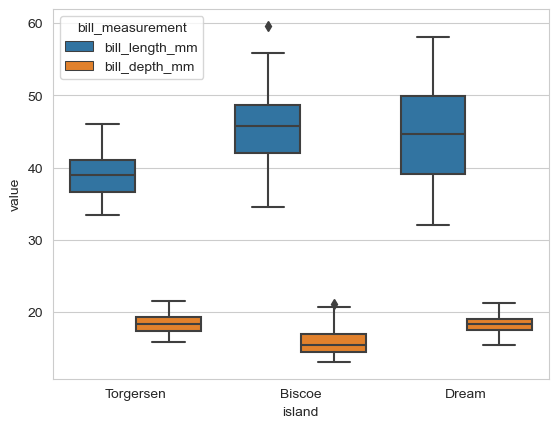

In [18]:
sns.boxplot(
    data=penguins_long,
    x='island',
    y='value',
    hue='bill_measurement'
);

Come back to the previous format using pivot function

In [51]:
wide_penguins = pd.pivot(
    penguins_long,             # <===  tidy/long format df
    columns='bill_measurement',    # <=== column(s) whose values we want as our new columns
    index=['id', 'island', 'species', 'sex'], # <=== column(s) that will be used as a new index
    values='value'               # <=== column whose values we want to populate our new wide dataframe
)

In [52]:
wide_penguins.head()

,,,bill_measurement,bill_depth_mm,bill_length_mm
id,island,species,sex,,
0,Torgersen,Adelie,Male,18.7,39.1
1,Torgersen,Adelie,Female,17.4,39.5
2,Torgersen,Adelie,Female,18.0,40.3
3,Torgersen,Adelie,NaN,NaN,NaN
4,Torgersen,Adelie,Female,19.3,36.7


In [53]:
wide_penguins=wide_penguins.reset_index()
wide_penguins


bill_measurement,id,island,species,sex,bill_depth_mm,bill_length_mm
0,0,Torgersen,Adelie,Male,18.7,39.1
1,1,Torgersen,Adelie,Female,17.4,39.5
2,2,Torgersen,Adelie,Female,18.0,40.3
3,3,Torgersen,Adelie,NaN,NaN,NaN
4,4,Torgersen,Adelie,Female,19.3,36.7
...,...,...,...,...,...,...
339,339,Biscoe,Gentoo,NaN,NaN,NaN
340,340,Biscoe,Gentoo,Female,14.3,46.8
341,341,Biscoe,Gentoo,Male,15.7,50.4
342,342,Biscoe,Gentoo,Female,14.8,45.2


#### Is the data the same as before? If not, why do you think so?

We dropped some of the columns while performing melting at the beginning and we can't retrieve them

**What are the average bill measurements? More about penguins statistics**

There are a few ways how to get some descriptive statistics about the data:
- run `.describe` method
- perform groupby
- pivot table the data

**`Pivot`**

- pivots table with aggregation
- default aggregation function is mean
- do not use unless you want to have aggregation
- if you have duplicates in the table pivot will return an error
- if you have duplicates in the table pivot_table will take the mean of the two observations
- please be careful which function you use and ensure the result you want is not aggregation without that being you goal

In [43]:
penguins_wide = penguins_long.pivot_table(
    values='value', 
    columns='bill_measurement',
    index=['island', 'sex'],
    aggfunc="mean"
)

In [44]:
penguins_wide

bill_measurement  bill_depth_mm  bill_length_mm
island    sex                                  
Biscoe    Female      15.191250       43.307500
          Male        16.597590       47.119277
Dream     Female      17.601639       42.296721
          Male        19.066129       46.116129
Torgersen Female      17.550000       37.554167
          Male        19.391304       40.586957

In [45]:
penguins_wide.reset_index(inplace=True)